In [ ]:
# Basic imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# Dataset settings
DATA_DIR = r"C:\Users\BB\Desktop\AI week 6 asgn\garbage_classification"
BATCH_SIZE = 8
IMG_SIZE = (128, 128)
SEED = 42


print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.20.0
GPU available: []


In [2]:
# Load dataset with 80% training and 20% validation split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset="training"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset="validation"
)

# Get class names
class_names = train_ds.class_names
print("Classes:", class_names)

# Optimize dataset loading
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.
Classes: ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [ ]:
# Build a CNN for Edge AI
inputs = keras.Input(shape=(128, 128, 3))

# Convolutional layers
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)

# Global pooling + Dropout
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)

# Output layer
outputs = layers.Dense(len(class_names), activation='softmax')(x)

# Create model
model = keras.Model(inputs, outputs)

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,364 (95.17 KB)

 Trainable params: 24,364 (95.17 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set number of epochs
EPOCHS = 5  
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/5
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.3922 - loss: 2.1014 - val_accuracy: 0.4886 - val_loss: 1.6000
Epoch 2/5
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.4932 - loss: 1.5674 - val_accuracy: 0.4844 - val_loss: 1.5258
Epoch 3/5
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.5389 - loss: 1.4109 - val_accuracy: 0.5678 - val_loss: 1.3456
Epoch 4/5
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.5731 - loss: 1.3062 - val_accuracy: 0.6001 - val_loss: 1.2621
Epoch 5/5
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5921 - loss: 1.2427 - val_accuracy: 0.6339 - val_loss: 1.1489


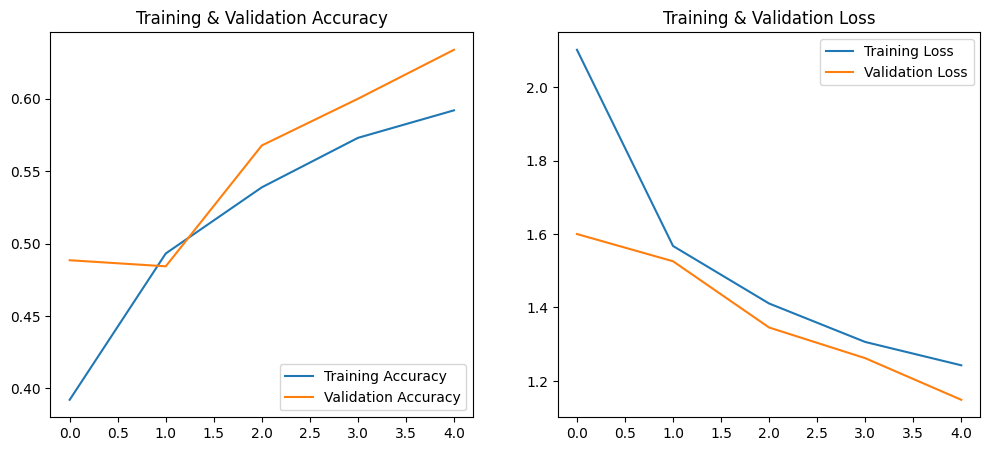

In [5]:
import matplotlib.pyplot as plt

# Extract metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

# Plot Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

# Plot Loss
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')

plt.show()


In [6]:
# Convert the trained model to TensorFlow Lite
tflite_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()

# Save the TFLite model to file
tflite_model_file = r"C:\Users\BB\Desktop\AI week 6 asgn\tiny_cnn_garbage.tflite"
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved at:", tflite_model_file)


INFO:tensorflow:Assets written to: C:\Users\BB\AppData\Local\Temp\tmp624c5wl1\assets


INFO:tensorflow:Assets written to: C:\Users\BB\AppData\Local\Temp\tmp624c5wl1\assets


Saved artifact at 'C:\Users\BB\AppData\Local\Temp\tmp624c5wl1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  1550643096144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1550643097296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1550643095952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1550643096912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1550643096528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1550643095760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1550643097680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1550643098640: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model saved at: C:\Users\BB\Desktop\AI week 6 asgn\tiny_cnn_garbage.tflite
